In [1]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

digits = load_digits()

In [2]:
digits.data.shape

(1797, 64)

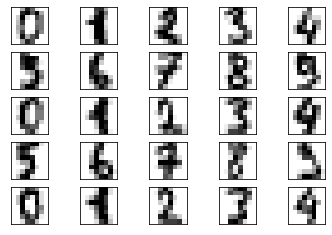

In [3]:
fig = plt.figure()
for i in range(25):
    ax = fig.add_subplot(5,5,i+1,xticks=[],yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation="nearest")

A good first-step for many problems is to visualize the data using a Dimensionality Reduction technique. We’ll start with the most straightforward one, Principal Component Analysis (PCA).

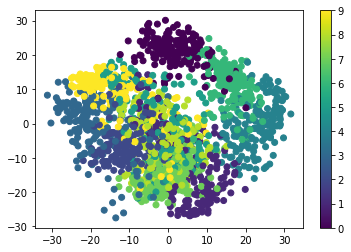

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(digits.data)
plt.scatter(proj[:,0],proj[:,1],c=digits.target)
plt.colorbar()



In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test = train_test_split(digits.data,digits.target)
clf = GaussianNB()
clf.fit(x_train,y_train)
result = clf.predict(x_test)
expected = y_test
print(result)
print(expected)

[1 8 0 0 0 9 7 5 7 8 5 0 5 5 4 0 0 2 1 8 9 7 5 5 2 5 7 2 5 3 9 4 1 9 7 4 0
 1 4 7 9 8 1 1 7 6 6 5 7 5 9 9 3 1 0 5 8 6 7 1 6 6 5 9 0 5 3 4 6 4 4 0 0 7
 6 8 8 3 8 8 4 8 7 1 8 3 8 4 8 7 4 8 3 3 9 5 7 4 4 2 8 7 2 8 3 0 8 1 4 3 3
 4 3 2 9 0 4 8 7 8 2 0 3 6 0 0 0 7 0 8 2 4 5 6 8 7 0 6 4 7 3 9 8 9 5 8 1 7
 4 5 8 0 0 5 0 6 4 1 8 8 8 5 5 7 9 1 6 7 4 9 0 9 7 7 6 5 8 6 4 1 6 0 8 6 6
 1 3 0 9 1 7 7 6 7 9 7 9 1 6 7 8 8 3 7 3 4 6 2 0 9 1 5 9 4 2 0 8 0 4 5 9 3
 3 2 8 2 4 2 8 1 0 1 2 9 1 0 8 5 3 3 6 4 7 6 5 4 9 8 7 7 6 7 5 5 1 0 5 3 8
 3 4 7 5 6 4 8 6 8 1 9 8 8 2 8 5 4 6 7 5 8 0 1 8 9 1 9 5 5 4 6 1 6 4 7 9 7
 1 8 8 8 5 2 7 3 8 5 5 9 1 2 5 9 6 6 5 8 7 1 1 5 2 2 0 1 3 6 4 0 5 5 3 1 2
 7 6 1 3 4 0 3 7 7 5 8 8 4 1 0 4 7 6 5 3 5 8 0 8 9 7 5 0 8 9 6 5 8 6 2 3 7
 7 2 6 3 4 7 5 9 9 3 7 1 0 5 0 7 0 9 0 9 9 1 0 1 1 0 9 2 9 3 3 3 7 2 2 1 3
 6 3 5 9 6 1 6 7 8 4 5 7 7 5 0 4 5 0 0 6 3 5 8 1 0 1 7 2 9 4 9 0 3 2 6 3 4
 9 7 7 2 3 7]
[1 8 0 0 0 9 7 5 7 8 5 0 5 5 4 0 0 2 1 8 9 7 5 3 2 5 7 2 5 3 9 4 1 9 7 4 0
 2 4 7 9 9 

In [26]:
len(x_train)

1347

In [27]:
len(x_test)

450

In [28]:
matches = (result == expected)
print(matches.sum())
print(len(matches))


386
450


In [29]:
matches.sum()/len(matches)

0.8577777777777778

We see that more than 80% of the 450 predictions match the input. But there are other more sophisticated metrics that can be used to judge the performance of a classifier: several are available in the sklearn.metrics submodule.
One of the most useful metrics is the classification_report, which combines several measures and prints a table with the results:

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(expected,result))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        50
           1       0.88      0.80      0.84        46
           2       1.00      0.67      0.80        42
           3       0.97      0.76      0.86        51
           4       0.95      0.83      0.89        47
           5       0.81      0.91      0.86        47
           6       0.98      1.00      0.99        40
           7       0.74      0.98      0.84        43
           8       0.67      0.86      0.75        44
           9       0.76      0.80      0.78        40

    accuracy                           0.86       450
   macro avg       0.87      0.86      0.86       450
weighted avg       0.88      0.86      0.86       450



In [33]:
print(confusion_matrix(expected,result))

[[48  0  0  0  1  0  0  1  0  0]
 [ 0 37  0  0  0  0  0  1  4  4]
 [ 0  4 28  0  0  0  0  0 10  0]
 [ 0  0  0 39  0  4  0  2  2  4]
 [ 1  0  0  0 39  2  0  5  0  0]
 [ 0  0  0  1  0 43  0  1  1  1]
 [ 0  0  0  0  0  0 40  0  0  0]
 [ 0  0  0  0  0  0  0 42  0  1]
 [ 0  1  0  0  0  3  0  2 38  0]
 [ 0  0  0  0  1  1  1  3  2 32]]


In [35]:
from sklearn.datasets import load_boston
d = load_boston()
print(d.data.shape)

(506, 13)


In [37]:
d.data.size

6578

In [57]:
d.target.size

506

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

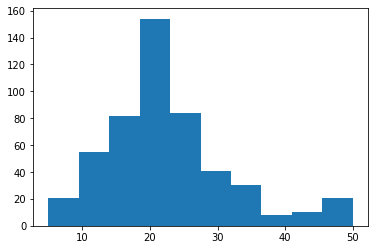

In [58]:
plt.hist(d.target)

([array([504.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([474.,  32.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([226., 280.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([  0.,   0.,  17., 123., 130.,  71.,  28.,   0.,   0., 137.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]),
  array([ 24.,  12.,   4.,   9.,  43., 414.,   0.,   0.,   0.,   0.]),
  array([506.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.])],
 array([  0. ,  71.1, 142.2, 213.3, 284.4, 355.5, 426.6, 497.7, 568.8,
     

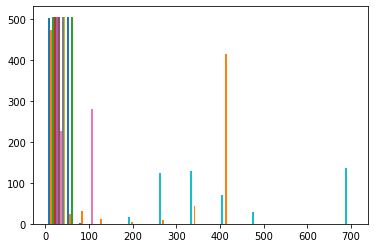

In [59]:
plt.hist(d.data)

In [63]:
d.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [72]:
d.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [65]:
d.data.shape

(506, 13)

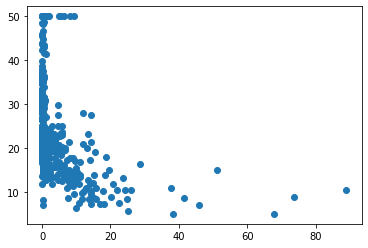

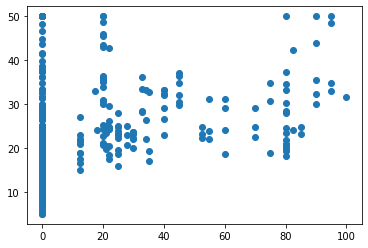

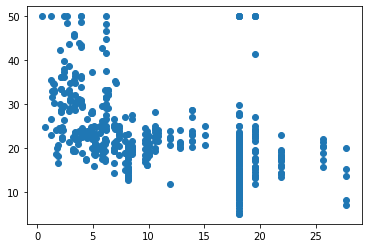

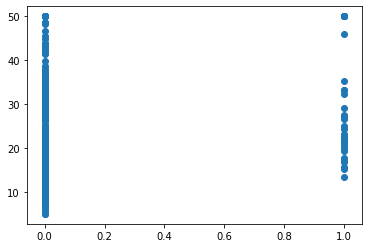

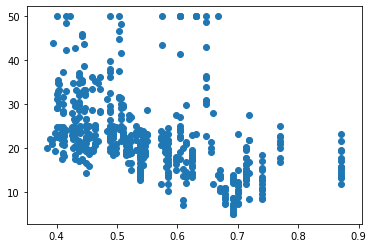

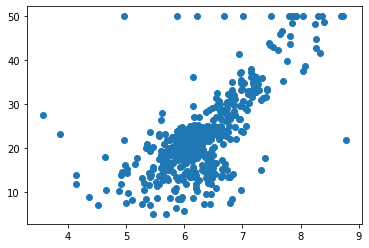

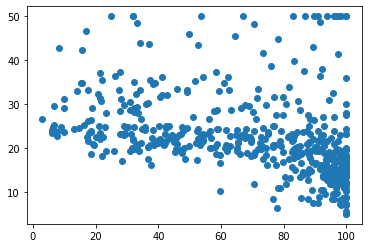

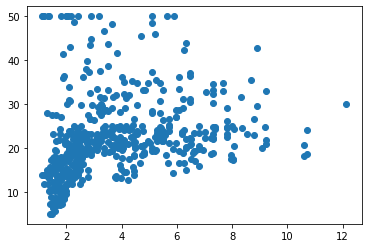

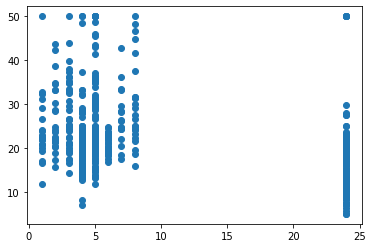

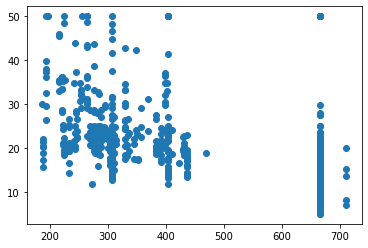

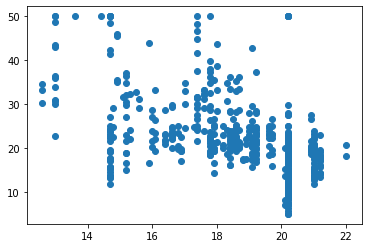

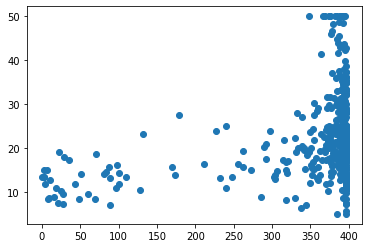

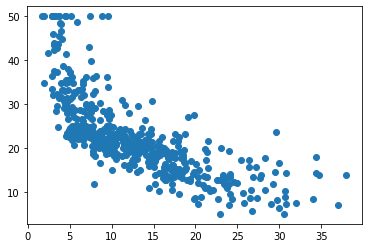

In [73]:
for index , feature_name in enumerate(d.feature_names):
    plt.figure()
    plt.scatter(d.data[:,index], d.target)

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(d.data, d.target)
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(x_train,y_train)
expected = y_test
predicted = clf.predict(x_test)
print("RMS : %s"% np.sqrt(np.mean((predicted-expected)**2)))


RMS : 4.761840681023727


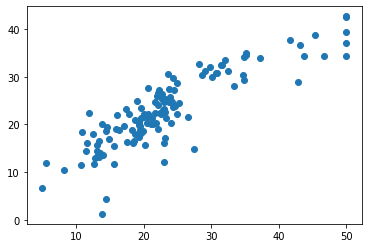

In [82]:
plt.scatter(expected,predicted)

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(d.data, d.target)
from sklearn.linear_model import LinearRegression
clf = GradientBoostingRegressor()
clf.fit(x_train,y_train)
expected = y_test
predicted = clf.predict(x_test)
print("RMS : %s"% np.sqrt(np.mean((predicted-expected)**2)))

RMS : 2.814436952999132


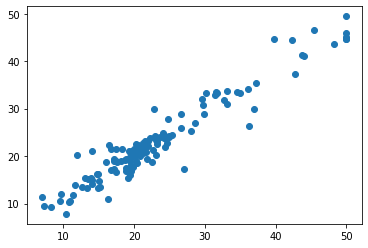

In [85]:
plt.scatter(expected,predicted)

(1797, 64)
[0 1 2 ... 8 9 8]
[[49  0  0  0  0  0  0  0  0  0]
 [ 0 44  0  0  0  0  0  0  0  0]
 [ 0  0 53  0  0  0  0  1  0  0]
 [ 0  0  0 48  0  0  0  0  0  0]
 [ 0  1  0  0 39  0  0  0  0  0]
 [ 0  0  0  0  0 37  0  0  0  1]
 [ 0  0  0  0  0  0 54  0  0  0]
 [ 0  0  0  0  0  0  0 53  0  0]
 [ 0  1  0  1  0  0  0  0 39  0]
 [ 0  0  0  0  1  0  0  0  0 28]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.96      1.00      0.98        44
           2       1.00      0.98      0.99        54
           3       0.98      1.00      0.99        48
           4       0.97      0.97      0.97        40
           5       1.00      0.97      0.99        38
           6       1.00      1.00      1.00        54
           7       0.98      1.00      0.99        53
           8       1.00      0.95      0.97        41
           9       0.97      0.97      0.97        29

    accuracy                           0.99 

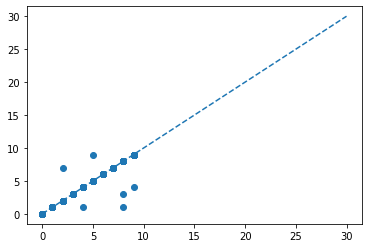

In [103]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.model_selection import  train_test_split
d = load_digits()
print(d.data.shape)
print(d.target)
x_train, x_test, y_train, y_test = train_test_split(d.data,d.target)
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)

predicted = clf.predict(x_test)
expected = y_test
print(metrics.confusion_matrix(expected,predicted))
print(metrics.classification_report(expected,predicted))
plt.scatter(expected,predicted)
plt.plot([0,30],[0,30],'--')


In [107]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
d = load_boston()
print(d.data.shape)
print(d.data.size)

clf = DecisionTreeRegressor().fit(d.data,d.target)
predicted = clf.predict(d.data)
expected = d.target


(506, 13)
6578


The averaged f1-score is often used as a convenient measure of the overall performance of an algorithm. It appears in the bottom row of the classification report; it can also be accessed directly:

(1797, 64), (1437, 64), 360
[[43  0  0  0  0  0  0  0  0  0]
 [ 0 35  0  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 41  0  0  0  0  0  0]
 [ 0  0  0  0 38  0  0  0  0  0]
 [ 0  0  0  0  0 29  0  0  0  1]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0  0  0  0  0 36  0  1]
 [ 0  0  0  0  0  0  0  0 29  0]
 [ 0  0  0  1  0  0  0  0  0 33]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        36
           3       0.98      1.00      0.99        41
           4       1.00      1.00      1.00        38
           5       1.00      0.97      0.98        30
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        37
           8       1.00      1.00      1.00        29
           9       0.94      0.97      0.96        34

    accuracy                           0.99  

0.9913825763679991

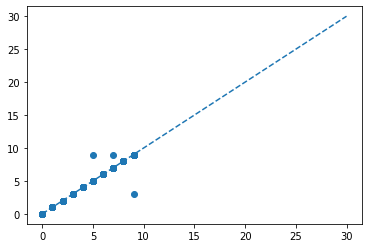

In [120]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import  train_test_split

d = load_digits()
x = d.data
y = d.target
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state = 1, test_size = 0.2)
print('%r, %r, %r'%(x.shape,x_train.shape,x_test.shape[0]))

clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train,y_train)
predicted = clf.predict(x_test)
expected = y_test

print(metrics.confusion_matrix(expected,predicted))
print(metrics.classification_report(expected,predicted))
plt.scatter(expected,predicted)
plt.plot([0,30],[0,30],'--')
metrics.f1_score(expected, predicted, average="macro")


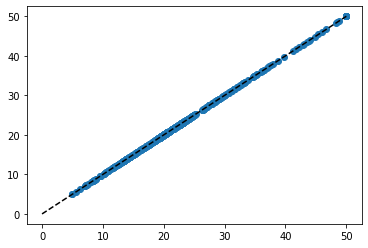

In [119]:
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

d = load_boston()
clf = DecisionTreeRegressor().fit(d.data, d.target)
predicted = clf.predict(d.data)
expected = d.target

plt.scatter(expected, predicted) 

plt.plot([0, 50], [0, 50], '--k') 


GaussianNB 0.8476457455473201
KNeighborsClassifier 0.9944395712307532
LinearSVC 0.9394444294042268


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


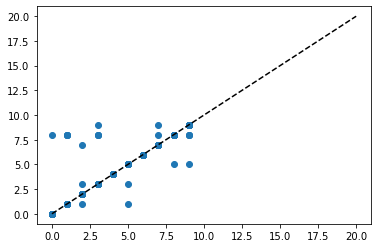

In [131]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn import metrics

d = load_digits()
x_train,x_test,y_train,y_test = train_test_split(d.data,d.target, random_state =1, test_size =0.2)
for model in [GaussianNB,KNeighborsClassifier,LinearSVC]:
    clf = model().fit(x_train,y_train)
    predicted = clf.predict(x_test)
    expected = y_test
    print("%s %s"%(model.__name__, metrics.f1_score(expected,predicted, average="macro")))

plt.scatter(expected, predicted) 
plt.plot([0, 20], [0, 20], '--k') 

In [133]:
from sklearn.datasets import load_diabetes
d = load_diabetes()
x,y = d.data, d.target
print(x.shape)

(442, 10)


In [136]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import cross_val_score

for model in [Ridge,Lasso]:
    clf= model()
    print("%s %s"%(model.__name__, cross_val_score(clf,x,y).mean()))
    

Ridge 0.40942743830329875
Lasso 0.35380008329932006


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
c:\users\user\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value o

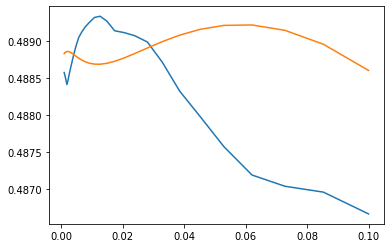

In [140]:
import numpy as np

alphas = np.logspace(-3,-1,30)
for model in [Lasso, Ridge]:
    scores = [ cross_val_score(model(alpha),x,y).mean() 
              for alpha in alphas]
    plt.plot(alphas,scores,label = model.__name__)